# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:

# Build query URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 


In [4]:
#Set up a list to hold data from responses
city_weather_data = []
# Create counter
counter_record = 0
counter_set = 0

In [5]:


# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval ")
print("---------------------------------")

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#Add a one second interval between queries to stay within API limit
time.sleep(3)

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if counter_record < 50:
          counter_record += 1
    else:
        counter_set += 1
        counter_record = 0
        
    #Print the rest of the statement
    print(f"Processing Record {counter_record} of Set {counter_set} | {city}")
        
    try:
        #Get weather data with JSON response
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        # Get data from JSON responses
        country = weather_json['sys']['country']
        date = weather_json['dt']
        humidity = weather_json['main']['humidity']
        lat_list = weather_json['coord']['lat']
        lng_list = weather_json['coord']['lon']
        max_temp = weather_json['main']['temp_max']
        cloudiness = weather_json['clouds']['all']
        wind_speed = weather_json['wind']['speed']
       
            
        #Add gathered information into city_weather_data list
        city_weather_data.append({"City": city,
                                 "Country": country,
                                 "Date": date,
                                 "Lat": lat_list,
                                 "Lng": lng_list,
                                 "Max Temp": max_temp,
                                 "Humidity": humidity, 
                                 "Cloudiness": cloudiness,
                                 "Wind Speed": wind_speed})
           
    except:
        print("City not found. Skipping...")
        continue

    
#Indicate the end of the list
print("---------------------------------")
print("Data Retrieval Complete ")
print("---------------------------------")

Beginning Data Retrieval 
---------------------------------
Processing Record 1 of Set 0 | porto novo
Processing Record 2 of Set 0 | kapaa
Processing Record 3 of Set 0 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 0 | nam tha
City not found. Skipping...
Processing Record 5 of Set 0 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 0 | itarema
Processing Record 7 of Set 0 | pyapon
Processing Record 8 of Set 0 | rikitea
Processing Record 9 of Set 0 | busselton
Processing Record 10 of Set 0 | divnogorsk
Processing Record 11 of Set 0 | umzimvubu
City not found. Skipping...
Processing Record 12 of Set 0 | mataura
Processing Record 13 of Set 0 | odlabari
Processing Record 14 of Set 0 | jibuti
Processing Record 15 of Set 0 | tooele
Processing Record 16 of Set 0 | arraial do cabo
Processing Record 17 of Set 0 | manggar
Processing Record 18 of Set 0 | lerwick
Processing Record 19 of Set 0 | svetlyy
Processing Record 20 of Set 0 | songea
Processing Re

Processing Record 36 of Set 3 | mzimba
Processing Record 37 of Set 3 | lebu
Processing Record 38 of Set 3 | nueva loja
Processing Record 39 of Set 3 | alekseyevka
Processing Record 40 of Set 3 | bredasdorp
Processing Record 41 of Set 3 | saskylakh
Processing Record 42 of Set 3 | yar-sale
Processing Record 43 of Set 3 | arlit
Processing Record 44 of Set 3 | ullapool
Processing Record 45 of Set 3 | san policarpo
Processing Record 46 of Set 3 | sinkat
City not found. Skipping...
Processing Record 47 of Set 3 | inirida
Processing Record 48 of Set 3 | port blair
Processing Record 49 of Set 3 | comodoro rivadavia
Processing Record 50 of Set 3 | pinotepa nacional
Processing Record 0 of Set 4 | agadez
Processing Record 1 of Set 4 | grand gaube
Processing Record 2 of Set 4 | royan
Processing Record 3 of Set 4 | tiksi
Processing Record 4 of Set 4 | ketchikan
Processing Record 5 of Set 4 | ribas do rio pardo
Processing Record 6 of Set 4 | bria
Processing Record 7 of Set 4 | beringovskiy
Processin

Processing Record 21 of Set 7 | reconquista
Processing Record 22 of Set 7 | kupang
Processing Record 23 of Set 7 | acapulco
Processing Record 24 of Set 7 | daltenganj
Processing Record 25 of Set 7 | robertsport
Processing Record 26 of Set 7 | souillac
Processing Record 27 of Set 7 | tabas
Processing Record 28 of Set 7 | frederico westphalen
Processing Record 29 of Set 7 | quimper
Processing Record 30 of Set 7 | nichinan
Processing Record 31 of Set 7 | pila
Processing Record 32 of Set 7 | mulchen
Processing Record 33 of Set 7 | livingston
Processing Record 34 of Set 7 | coihaique
Processing Record 35 of Set 7 | saint-francois
Processing Record 36 of Set 7 | pangnirtung
Processing Record 37 of Set 7 | marinette
Processing Record 38 of Set 7 | mareeba
Processing Record 39 of Set 7 | faanui
Processing Record 40 of Set 7 | kavieng
Processing Record 41 of Set 7 | delta
Processing Record 42 of Set 7 | cairns
Processing Record 43 of Set 7 | cidreira
Processing Record 44 of Set 7 | kisangani
Pr

Processing Record 3 of Set 11 | kargasok
Processing Record 4 of Set 11 | umba
Processing Record 5 of Set 11 | tsuyama
Processing Record 6 of Set 11 | aswan
Processing Record 7 of Set 11 | suozhen
Processing Record 8 of Set 11 | khowai
Processing Record 9 of Set 11 | aripuana
Processing Record 10 of Set 11 | bereda
Processing Record 11 of Set 11 | sapao
City not found. Skipping...
Processing Record 12 of Set 11 | gushikawa
Processing Record 13 of Set 11 | sing buri
Processing Record 14 of Set 11 | wasilla
Processing Record 15 of Set 11 | hervey bay
Processing Record 16 of Set 11 | cheremukhovo
Processing Record 17 of Set 11 | bermejo
Processing Record 18 of Set 11 | lewiston
Processing Record 19 of Set 11 | maryborough
Processing Record 20 of Set 11 | shupiyan
Processing Record 21 of Set 11 | berlevag
Processing Record 22 of Set 11 | yushu
Processing Record 23 of Set 11 | nauta
Processing Record 24 of Set 11 | kapoeta
Processing Record 25 of Set 11 | meulaboh
Processing Record 26 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#Create a DataFrame using information that was collected
city_weather_data_pd = pd.DataFrame(city_weather_data)

city_weather_data_pd.head(30)
city_weather_data_pd.head(-1)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,porto novo,BJ,1643912886,6.4965,2.6036,84.02,64,75,8.39
1,kapaa,US,1643912886,22.0752,-159.3190,71.92,77,20,11.50
2,itarema,BR,1643912887,-2.9248,-39.9167,85.23,65,78,16.22
3,pyapon,MM,1643912888,16.2833,95.6833,68.25,65,14,5.97
4,rikitea,PF,1643912683,-23.1203,-134.9692,77.36,77,100,14.41
...,...,...,...,...,...,...,...,...,...
553,vagay,RU,1643912944,57.9375,69.0217,23.50,88,100,11.65
554,aden,YE,1643913160,12.7794,45.0367,78.13,60,0,9.44
555,rutland,US,1643913008,43.6167,-73.0162,42.24,94,100,1.01
556,revelstoke,CA,1643913161,50.9832,-118.2023,17.62,93,100,0.00


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#Check if there are any cities with Humidity >100% 
city_weather_data_pd["Humidity"].describe()

count    559.000000
mean      73.465116
std       21.719170
min        6.000000
25%       62.000000
50%       77.000000
75%       91.000000
max      100.000000
Name: Humidity, dtype: float64

In [19]:
# Get the indices of cities that have humidity over 100%.
humidity_max = city_weather_data_pd[(city_weather_data_pd["Humidity"] > 100)].index
humidity_max

Int64Index([], dtype='int64')

In [11]:
#Export the city weather data into a csv file
city_weather_data_pd.to_csv("output_data/cities_myhw.csv", index=False)
city_weather_data_pd.count()

City          559
Country       559
Date          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

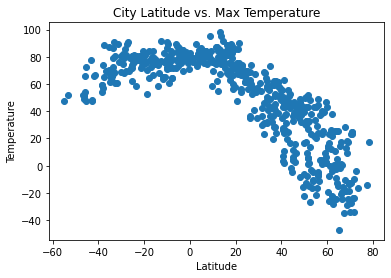

In [21]:
# Create a Scatter Plot for latitude vs. temperature

x_values = city_weather_data_pd['Lat']
y_values = city_weather_data_pd['Max Temp']
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig("Images/Latitude vs Max Temperature.png")
plt.show()

In this plot we can clearly see that temperature is dropping as we are moving away from the equator.

## Latitude vs. Humidity Plot

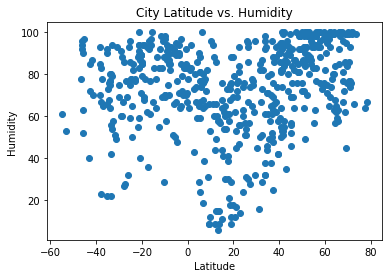

In [22]:
# Create a Scatter Plot for latitude vs. humidity

x_values = city_weather_data_pd['Lat']
y_values = city_weather_data_pd['Humidity']
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("Images/Latitude vs Humidity.png")
plt.show()

There is no clear data we can take away from this plot, therefore we can tell that there is no conection between latitude and humidity.  

## Latitude vs. Cloudiness Plot

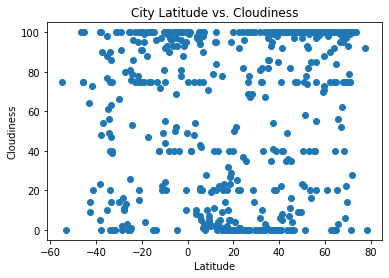

In [23]:
# Create a Scatter Plot for latitude vs. cloudiness

x_values = city_weather_data_pd['Lat']
y_values = city_weather_data_pd['Cloudiness']
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("Images/Latitude vs Cloudiness.png")
plt.show()

There is no clear data we can take away from this plot, therefore we can tell that there is no conection between latitude and cloudiness. 

## Latitude vs. Wind Speed Plot

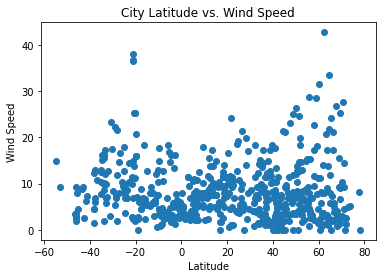

In [24]:
# Create a Scatter Plot for latitude vs. wind speed

x_values = city_weather_data_pd['Lat']
y_values = city_weather_data_pd['Wind Speed']
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("Images/Latitude vs Wind Speed.png")
plt.show()

There is no clear data we can take away from this plot, therefore we can tell that there is no conection between latitude and wind speed.

## Linear Regression

In [27]:
# Create Northern and Southern Hemisphere DataFrames
northern_pd = city_weather_data_pd.loc[pd.to_numeric(city_weather_data_pd["Lat"]).astype(float) > 0, :]
southern_pd = city_weather_data_pd.loc[pd.to_numeric(city_weather_data_pd["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

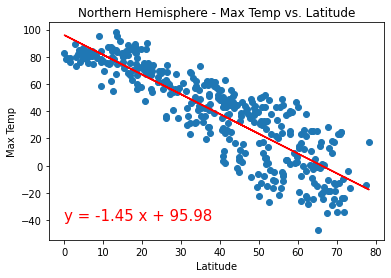

In [32]:
# Calculate the correlation coefficient and linear regression model 
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = pd.to_numeric(northern_pd["Lat"]).astype(float)
y_values = pd.to_numeric(northern_pd["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(0,-40), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.savefig("Images/NorthHem_MaxTemp_Lat.png")
plt.show()

The regression displays a negative correlation.
According to our plot, we can see, in the Northern Hemisphere as we move away from the equator the temperature decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

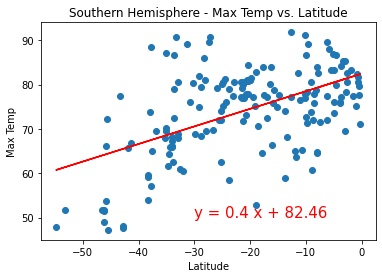

In [34]:
# Calculate the correlation coefficient and linear regression model 
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = pd.to_numeric(southern_pd["Lat"]).astype(float)
y_values = pd.to_numeric(southern_pd["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(-30,50), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.savefig("Images/SouthHem_MaxTemp_Lat.png")
plt.show()

The regression displays a positive correlation.
According to our plot, we can see, in the Southern Hemisphere as we move closer to the equator the temperature increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

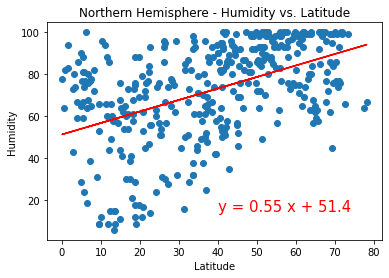

In [36]:
# Calculate the correlation coefficient and linear regression model 
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(northern_pd["Lat"]).astype(float)
y_values = pd.to_numeric(northern_pd["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(40,15), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.savefig("Images/NorthHem_Humidity_Lat.png")
plt.show()

There is no clear data we can take away from this plot, therefore we can tell that there is no correlation between the data set. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

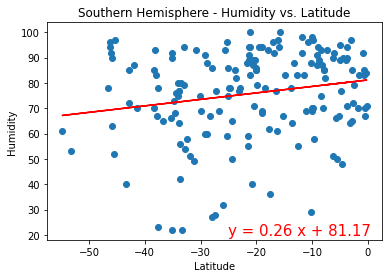

In [38]:
# Calculate the correlation coefficient and linear regression model 
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(southern_pd["Lat"]).astype(float)
y_values = pd.to_numeric(southern_pd["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(-25,20), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.savefig("Images/SouthHem_Humidity_Lat.png")
plt.show()

There is no clear data we can take away from this plot, therefore we can tell that there is no correlation between the data set.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

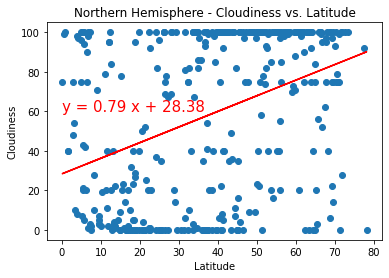

In [40]:
# Calculate the correlation coefficient and linear regression model 
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(northern_pd["Lat"]).astype(float)
y_values = pd.to_numeric(northern_pd["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(0,60), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.savefig("Images/NorthHem_Cloudiness_Lat.png")
plt.show()

There is no clear data we can take away from this plot, therefore we can tell that there is no correlation between the data set.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

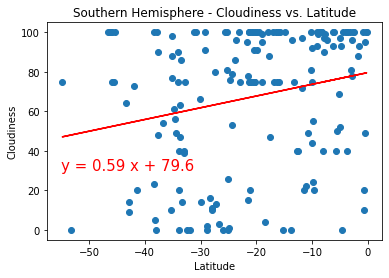

In [44]:
# Calculate the correlation coefficient and linear regression model 
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(southern_pd["Lat"]).astype(float)
y_values = pd.to_numeric(southern_pd["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(-55,30), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.savefig("Images/SouthHem_Cloudiness_Lat.png")
plt.show()

There is no clear data we can take away from this plot, therefore we can tell that there is no correlation between the data set.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

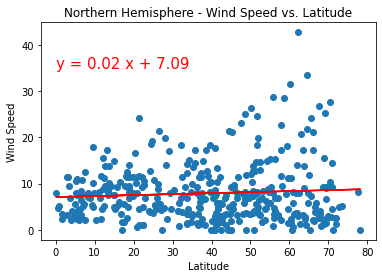

In [46]:
# Calculate the correlation coefficient and linear regression model 
# Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
x_values = pd.to_numeric(northern_pd["Lat"]).astype(float)
y_values = pd.to_numeric(northern_pd["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(0,35), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.savefig("Images/NorthHem_Wind Speed_Lat.png")
plt.show()

There is no clear data we can take away from this plot, therefore we can tell that there is no correlation between the data set.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

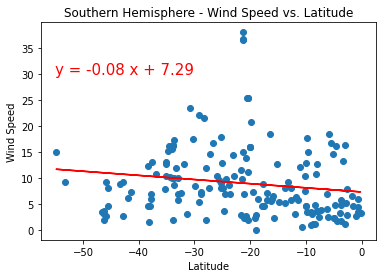

In [47]:
# Calculate the correlation coefficient and linear regression model 
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(southern_pd["Lat"]).astype(float)
y_values = pd.to_numeric(southern_pd["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(-55,30), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.savefig("Images/SouthHem_Wind Speed_Lat.png")
plt.show()

There is no clear data we can take away from this plot, therefore we can tell that there is no correlation between the data set.